# 2. Working with data

In [3]:
import torch

## Datasets

In [6]:
from torch.utils.data import Dataset

### Example 1

In [7]:
class SimpleDataset(Dataset):
    def __init__(self):
        self.data = torch.rand(10)
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        sample = self.data[index]
        label = sample > 0.5
        return (sample, label)

In [8]:
dt = SimpleDataset()
dt.data

tensor([0.0982, 0.2874, 0.3721, 0.4019, 0.9287, 0.6667, 0.9899, 0.8814, 0.7440,
        0.7568])

In [9]:
dt[2]

(tensor(0.3721), tensor(False))

### Example 2

In [23]:
!tree -nd alien-vs-predator

alien-vs-predator
├── train
│   ├── alien
│   └── predator
└── validation
    ├── alien
    └── predator

6 directories


![predator](alien-vs-predator/train/predator/10.jpg)
![alien](alien-vs-predator/train/alien/10.jpg)

In [198]:
from pathlib import Path
from PIL import Image

class AlienPredatorDataset(Dataset):
    def __init__(self, root, split="train"):
        self.root = root
        self.split = split
        
        self.classes = ["alien", "predator"]
        
        # Load and save all image paths
        # In practice, we don't want to load all images in memory - usually unfeasible
        # Instead, we want to load the the path to all the images
        
        self.img_instances = []
        
        for img_path in Path(root, split, "alien").glob("*.jpg"):
            self.img_instances.append((img_path, 0))
            
        for img_path in Path(root, split, "predator").glob("*.jpg"):
            self.img_instances.append((img_path, 1))
    
    
    def __len__(self):
        return len(self.img_instances)
    
    
    def __getitem__(self, index):
        path, target = self.img_instances[index]
        
        with open(path, 'rb') as f:
            img = Image.open(f)
            img.convert('RGB')
            
        return img, target

In [76]:
dt = AlienPredatorDataset("alien-vs-predator/", "train")
len(dt)

694

In [80]:
dt[0]

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x225 at 0x7FCF6E82D1D0>,
 0)

### Using torchvision ImageFolder

In [63]:
from torchvision.datasets import ImageFolder

In [64]:
dataset = ImageFolder(root="alien-vs-predator/")

In [89]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=225x225 at 0x7FCF6E804438>, 0)

As you can see, here our datasets return an image with its label. The image is a PIL image, it's not a Tensor, but usually you'll need the dataset to return a Tensor that you can input into your network.  

That's where torchvision transforms come into play. They can transform your image to a Tensor, and much more !

### Using torchvision's transforms

Torchvision provides functions that allows to apply transformation on images. It can help transform image to tensor, tensor to image, but also has many functions to do image augmentation.

A transformation will exist either as an class or as a function, and you can see that torchvision provides both versions for most tranforms.

In [93]:
from torchvision.transforms import ToTensor, RandomHorizontalFlip, CenterCrop, ToPILImage

In [94]:
from torchvision.transforms.functional import to_tensor, hflip, center_crop, to_pil_image

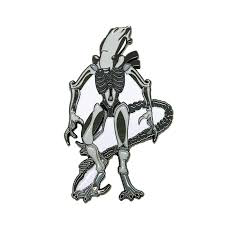

In [131]:
img = dt[0][0]
img

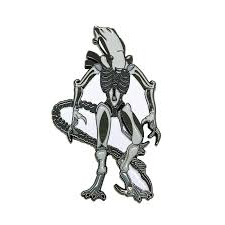

In [132]:
hflip(img)

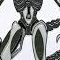

In [101]:
center_crop(img, output_size=(60,60))

Usually, what we need is to combine multiple transforms and to apply it at once. Then, it is useful to use the class form.

To combine multiple transforms sequentially, we have the Compose class.

In [103]:
from torchvision.transforms import Compose

In [134]:
# LIVE
transform = Compose((
    CenterCrop((100, 100)),
    RandomHorizontalFlip(),
))

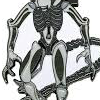

In [147]:
transform(img)

In [148]:
# Live - add
transform = Compose((
    CenterCrop((100, 100)),
    RandomHorizontalFlip(),
    ToTensor()
))

In [149]:
transform(img)

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

### Apply tranform to a dataset

In [150]:
# Live
dataset = ImageFolder(root="alien-vs-predator/", transform=transform)

In [193]:
dataset[0]

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]), 0)

So the dataset provides an interface between the filesystem and python, and returns a sample with its label, only one at a time.

Usually, you often need to process batches of samples and to shuffle the data, and that is what dataloaders are made for.

## Dataloaders

In [194]:
from torch.utils.data import DataLoader

In [195]:
loader = DataLoader(dataset, batch_size=5, shuffle=True)

In [197]:
# Live
for sample, label in loader:
    print(sample.size(), label)
    break

torch.Size([5, 3, 100, 100]) tensor([0, 0, 0, 1, 1])


You can make the dataloader run the data preparation in parallel using multiple workers (num_workers)

## Building our training loop (2 / 5)

In [10]:
# INITIALIZATION

import torch
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, ToTensor, RandomCrop
from torchvision.datasets import ImageFolder

device = torch.device("cpu")

transform = Compose((RandomCrop((50, 50)), ToTensor()))
dataset = ImageFolder(root="alien-vs-predator/", transform=transform)
loader = DataLoader(dataset, batch_size=5, shuffle=True)

In [11]:
# TRAINING LOOP

for samples, labels in loader:
    samples = samples.to(device)
    labels = labels.to(device)
    # compute predictions with model
    # compute the loss
    # compute gradients
    # update model parameters